In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("final/olivia-khan-academy-kids.csv")

In [3]:
df.head()

,date,developerResponse,review,rating,isEdited,title,userName
0,2023-01-27 09:48:46,"{'id': 34575065, 'body': 'We sincerely appreci...",Kahn Academy Kids is the best educational kids...,5,False,Wow! Just what my kids needed!,Triciaroseyrose
1,2021-01-01 16:18:30,"{'id': 20176204, 'body': ""It's exciting to hea...",My daughter(age 7) used Khan Academy in school...,5,False,A+ app for kids!,keeperofthecookies
2,2024-01-30 17:53:10,"{'id': 41714643, 'body': ""It's so exciting to ...",I have used this app for years with all 3 of m...,5,False,The Absolute Best,Zin468
3,2024-07-23 02:36:02,"{'id': 45577529, 'body': ""We're so pleased you...",I don’t even know where to start! I am so impr...,5,False,Absolutely blown away! They are partnered with...,tinabeanababy
4,2020-09-10 21:56:42,"{'id': 17878584, 'body': 'Our design team will...",My 4-year-old has been cruising through severa...,5,False,Very well-designed for actual learning,CrocoPhile


# quick eda

In [4]:
df['rating'].value_counts()

rating
5    726
4     44
3     19
1      8
2      5
Name: count, dtype: int64

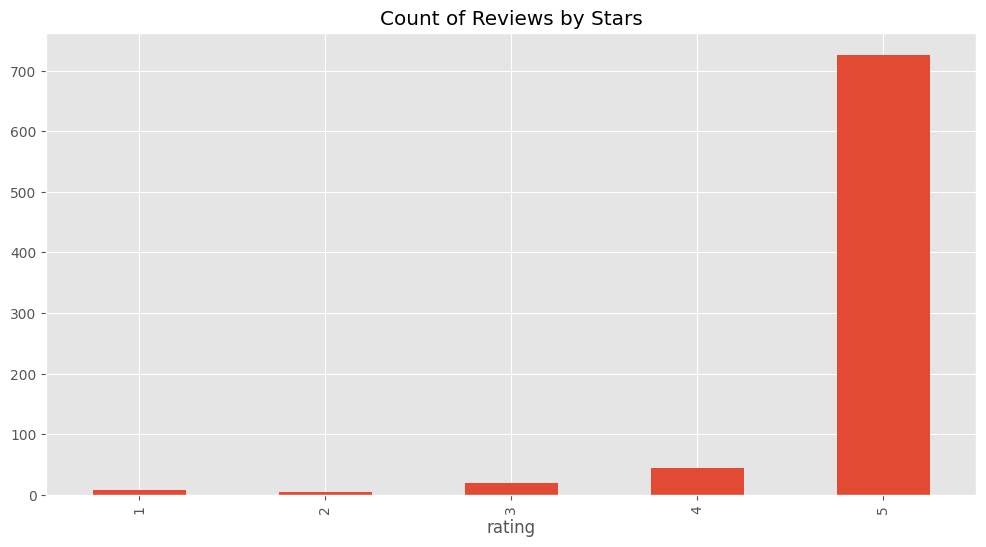

In [5]:
df['rating'].value_counts().sort_index().plot(kind = 'bar', title = 'Count of Reviews by Stars', figsize = (12,6))
plt.show()

# tokenizing

In [6]:
test = df['review'][10]
test

'Thank you Khan academy kids, you saved us! We’ve used ABC mouse and other apps but this is by far the best one! There are so many resources and tools to use that help parents and kiddos, with daily routines and learning paths. From printouts to planning a picture friendly schedule for the children to see very day and follow, it’s been a lifesaver. We lost so much learning time during the pandemic and our preschool days suffered. Now we’re having to catch up before elementary school and Khan academy is our biggest ally! I almost wasted thousands of dollars on Sylvan learning, but I’ve already seen a massive improvement in my children’s learning from just one week of using the app. It took a moment to get used to the buttons and how to navigate or repeat the questions, as the instructions aren’t very clear, but once you get that part out of the way, the children can easily navigate through each lesson and actually enjoy it! I have to limit their lesson time rather then them tell me they

In [10]:
tokens = nltk.word_tokenize(test)
tokens[:10]

['Thank', 'you', 'Khan', 'academy', 'kids', ',', 'you', 'saved', 'us', '!']

part of speech

In [14]:
pos_tags = nltk.pos_tag(tokens)
pos_tags[:10]

[('Thank', 'NNP'),
 ('you', 'PRP'),
 ('Khan', 'NNP'),
 ('academy', 'VB'),
 ('kids', 'NNS'),
 (',', ','),
 ('you', 'PRP'),
 ('saved', 'VBD'),
 ('us', 'PRP'),
 ('!', '.')]

key: https://www.guru99.com/pos-tagging-chunking-nltk.html

In [18]:
entities = nltk.chunk.ne_chunk(pos_tags)
entities.pprint()

(S
  Thank/NNP
  you/PRP
  Khan/NNP
  academy/VB
  kids/NNS
  ,/,
  you/PRP
  saved/VBD
  us/PRP
  !/.
  We/PRP
  ’/VBP
  ve/NNS
  used/VBN
  (ORGANIZATION ABC/NNP)
  mouse/NN
  and/CC
  other/JJ
  apps/NN
  but/CC
  this/DT
  is/VBZ
  by/IN
  far/RB
  the/DT
  best/JJS
  one/NN
  !/.
  There/EX
  are/VBP
  so/RB
  many/JJ
  resources/NNS
  and/CC
  tools/NNS
  to/TO
  use/VB
  that/DT
  help/NN
  parents/NNS
  and/CC
  kiddos/NNS
  ,/,
  with/IN
  daily/JJ
  routines/NNS
  and/CC
  learning/VBG
  paths/NNS
  ./.
  From/IN
  printouts/NNS
  to/TO
  planning/VBG
  a/DT
  picture/NN
  friendly/JJ
  schedule/NN
  for/IN
  the/DT
  children/NNS
  to/TO
  see/VB
  very/RB
  day/NN
  and/CC
  follow/NN
  ,/,
  it/PRP
  ’/VBD
  s/RB
  been/VBN
  a/DT
  lifesaver/NN
  ./.
  We/PRP
  lost/VBD
  so/RB
  much/JJ
  learning/NN
  time/NN
  during/IN
  the/DT
  pandemic/JJ
  and/CC
  our/PRP$
  preschool/NN
  days/NNS
  suffered/VBD
  ./.
  Now/RB
  we/PRP
  ’/VBP
  re/JJ
  having/VBG
  to/TO
  catc

# rule based approach

In [19]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()
#uses VADER which doesn't account for sequences

In [20]:
sia.polarity_scores("I am so so happy!")

{'neg': 0.0, 'neu': 0.358, 'pos': 0.642, 'compound': 0.7492}

In [21]:
sia.polarity_scores("I am very angry!")

{'neg': 0.66, 'neu': 0.34, 'pos': 0.0, 'compound': -0.5974}

In [22]:
sia.polarity_scores(test)

{'neg': 0.047, 'neu': 0.759, 'pos': 0.194, 'compound': 0.9885}

In [23]:
df = df.reset_index()
df

,index,date,developerResponse,review,rating,isEdited,title,userName
0,0,2023-01-27 09:48:46,"{'id': 34575065, 'body': 'We sincerely appreci...",Kahn Academy Kids is the best educational kids...,5,False,Wow! Just what my kids needed!,Triciaroseyrose
1,1,2021-01-01 16:18:30,"{'id': 20176204, 'body': ""It's exciting to hea...",My daughter(age 7) used Khan Academy in school...,5,False,A+ app for kids!,keeperofthecookies
2,2,2024-01-30 17:53:10,"{'id': 41714643, 'body': ""It's so exciting to ...",I have used this app for years with all 3 of m...,5,False,The Absolute Best,Zin468
3,3,2024-07-23 02:36:02,"{'id': 45577529, 'body': ""We're so pleased you...",I don’t even know where to start! I am so impr...,5,False,Absolutely blown away! They are partnered with...,tinabeanababy
4,4,2020-09-10 21:56:42,"{'id': 17878584, 'body': 'Our design team will...",My 4-year-old has been cruising through severa...,5,False,Very well-designed for actual learning,CrocoPhile
...,...,...,...,...,...,...,...,...
797,797,2020-11-09 21:38:01,NaN,This is a handy app to use when the grandchild...,5,False,Grams tool for bored grandchildren,Keepthemlearning!
798,798,2020-11-03 00:49:06,NaN,My 3 year old recently started remote pre-k3. ...,5,False,Great for learning,BillCraven
799,799,2020-10-05 22:37:53,"{'id': 18358613, 'body': 'Pleased to hear the ...",Under any circumstances Khan Academy would be ...,5,False,Remote learning support,Texas Mia
800,800,2020-08-28 03:36:15,NaN,I love to use this app with my three-year-old ...,5,False,Best app ever for preschool kids!,CB in Mpls


In [24]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['review']
    myid = row['index']
    res[myid] = sia.polarity_scores(text)


  0%|          | 0/802 [00:00<?, ?it/s]

In [25]:
res

{0: {'neg': 0.033, 'neu': 0.787, 'pos': 0.179, 'compound': 0.9919},
 1: {'neg': 0.01, 'neu': 0.816, 'pos': 0.173, 'compound': 0.9944},
 2: {'neg': 0.007, 'neu': 0.764, 'pos': 0.23, 'compound': 0.9952},
 3: {'neg': 0.005, 'neu': 0.779, 'pos': 0.216, 'compound': 0.9953},
 4: {'neg': 0.036, 'neu': 0.768, 'pos': 0.196, 'compound': 0.9928},
 5: {'neg': 0.029, 'neu': 0.716, 'pos': 0.255, 'compound': 0.9966},
 6: {'neg': 0.096, 'neu': 0.759, 'pos': 0.145, 'compound': 0.9201},
 7: {'neg': 0.048, 'neu': 0.703, 'pos': 0.249, 'compound': 0.9952},
 8: {'neg': 0.008, 'neu': 0.897, 'pos': 0.095, 'compound': 0.9638},
 9: {'neg': 0.104, 'neu': 0.779, 'pos': 0.118, 'compound': 0.5775},
 10: {'neg': 0.047, 'neu': 0.759, 'pos': 0.194, 'compound': 0.9885},
 11: {'neg': 0.013, 'neu': 0.819, 'pos': 0.168, 'compound': 0.984},
 12: {'neg': 0.069, 'neu': 0.742, 'pos': 0.189, 'compound': 0.9855},
 13: {'neg': 0.019, 'neu': 0.758, 'pos': 0.223, 'compound': 0.9932},
 14: {'neg': 0.048, 'neu': 0.725, 'pos': 0.226,

In [26]:
new_df = pd.DataFrame(res).T

In [27]:
new_df.head()

,neg,neu,pos,compound
0,0.033,0.787,0.179,0.9919
1,0.010,0.816,0.173,0.9944
2,0.007,0.764,0.230,0.9952
3,0.005,0.779,0.216,0.9953
4,0.036,0.768,0.196,0.9928


In [28]:
new_df['compound'].mean()

0.8608481296758104

# machine learning implementation

In [29]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [31]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
#Roberta model trained on twitter data

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

C:\Users\Ryan Jewik\anaconda3\envs\env\lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Ryan Jewik\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [32]:
#rule based results
sia.polarity_scores(test)

{'neg': 0.047, 'neu': 0.759, 'pos': 0.194, 'compound': 0.9885}

In [34]:
def polarity_scores_roberta(test):
    encoded_text = tokenizer(test, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2],
    }
    return scores_dict

In [39]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['review']
        myid = row['index']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except: RunTimeError:
        print(f'Broke for id: {myid}')

  0%|          | 0/802 [00:00<?, ?it/s]

In [40]:
both

{'vader_neg': 0.05,
 'vader_neu': 0.725,
 'vader_pos': 0.226,
 'vader_compound': 0.8588,
 'roberta_neg': 0.0022477002,
 'roberta_neu': 0.0121687995,
 'roberta_pos': 0.98558354}

In [44]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index()
results_df.head()

,index,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos
0,0,0.033,0.787,0.179,0.9919,0.002379,0.015420,0.982201
1,1,0.010,0.816,0.173,0.9944,0.002633,0.026059,0.971308
2,2,0.007,0.764,0.230,0.9952,0.006599,0.038992,0.954408
3,3,0.005,0.779,0.216,0.9953,0.002005,0.006695,0.991299
4,4,0.036,0.768,0.196,0.9928,0.004874,0.030932,0.964194


In [47]:
final_df = results_df.merge(df[['index', 'review', 'rating']], on = 'index')

In [48]:
final_df.head()

,index,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,review,rating
0,0,0.033,0.787,0.179,0.9919,0.002379,0.015420,0.982201,Kahn Academy Kids is the best educational kids...,5
1,1,0.010,0.816,0.173,0.9944,0.002633,0.026059,0.971308,My daughter(age 7) used Khan Academy in school...,5
2,2,0.007,0.764,0.230,0.9952,0.006599,0.038992,0.954408,I have used this app for years with all 3 of m...,5
3,3,0.005,0.779,0.216,0.9953,0.002005,0.006695,0.991299,I don’t even know where to start! I am so impr...,5
4,4,0.036,0.768,0.196,0.9928,0.004874,0.030932,0.964194,My 4-year-old has been cruising through severa...,5


In [49]:
final_df[final_df['rating'] == 5]

,index,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,review,rating
0,0,0.033,0.787,0.179,0.9919,0.002379,0.015420,0.982201,Kahn Academy Kids is the best educational kids...,5
1,1,0.010,0.816,0.173,0.9944,0.002633,0.026059,0.971308,My daughter(age 7) used Khan Academy in school...,5
2,2,0.007,0.764,0.230,0.9952,0.006599,0.038992,0.954408,I have used this app for years with all 3 of m...,5
3,3,0.005,0.779,0.216,0.9953,0.002005,0.006695,0.991299,I don’t even know where to start! I am so impr...,5
4,4,0.036,0.768,0.196,0.9928,0.004874,0.030932,0.964194,My 4-year-old has been cruising through severa...,5
...,...,...,...,...,...,...,...,...,...,...
797,797,0.000,0.782,0.218,0.7783,0.001772,0.025247,0.972981,This is a handy app to use when the grandchild...,5
798,798,0.054,0.814,0.132,0.5010,0.010273,0.097459,0.892268,My 3 year old recently started remote pre-k3. ...,5
799,799,0.000,0.834,0.166,0.6798,0.009018,0.123120,0.867862,Under any circumstances Khan Academy would be ...,5
800,800,0.000,0.593,0.407,0.9476,0.001124,0.008661,0.990215,I love to use this app with my three-year-old ...,5


In [50]:
final_df[final_df['rating'] == 1]

,index,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,review,rating
9,9,0.104,0.779,0.118,0.5775,0.294186,0.432152,0.273663,I noticed that new features to restrict button...,1
175,175,0.130,0.671,0.199,0.8371,0.155375,0.190728,0.653897,It is a very awesome app I love it and I feel ...,1
183,183,0.059,0.794,0.147,0.9234,0.330557,0.392171,0.277272,I LOVED this app but I noticed my child listen...,1
372,372,0.091,0.696,0.213,0.9338,0.166809,0.230214,0.602977,I was really excited to try this app to reinfo...,1
419,419,0.055,0.910,0.036,-0.4086,0.788245,0.196268,0.015487,It’s not OK to teach kids who are 2 years old ...,1
438,438,0.086,0.839,0.075,-0.2846,0.422848,0.347097,0.230054,We’ve had fun w/ this program and appreciate i...,1
760,760,0.000,1.000,0.000,0.0000,0.689482,0.263535,0.046984,Put some instructions on the page. Put accoun...,1
771,771,0.061,0.856,0.084,0.0534,0.951041,0.043457,0.005501,After creating an account – entering my email ...,1
